In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
import pydot
import graphviz
from sklearn.metrics import confusion_matrix
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plantvillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2475 files belonging to 2 classes.


In [4]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=800):
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=10)
    
    len_dataset=len(ds)
    
    train_size=int(train_split*len_dataset)
    
    val_size=int(val_split*len_dataset)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds=get_dataset_partitions(dataset)

In [7]:
print(len(train_ds),len(val_ds),len(test_ds))

62 7 9


In [8]:
class_names=dataset.class_names
no_classes=2

In [9]:
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [10]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augumentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2),
    layers.RandomZoom(0.2)
])

In [10]:
layers.Conv2D??

In [12]:
model=models.Sequential([
    resize_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(no_classes,activation='softmax')
])

In [13]:
model.build(input_shape=(32,256,256,3))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history=model.fit(
    train_ds,
    epochs=15,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
62/62 [==============================] - 194s 3s/step - loss: 0.5683 - accuracy: 0.6938 - val_loss: 0.5822 - val_accuracy: 0.8036
Epoch 2/15
62/62 [==============================] - 147s 2s/step - loss: 0.2091 - accuracy: 0.9195 - val_loss: 0.1911 - val_accuracy: 0.9420
Epoch 3/15
62/62 [==============================] - 139s 2s/step - loss: 0.1448 - accuracy: 0.9480 - val_loss: 0.1386 - val_accuracy: 0.9420
Epoch 4/15
62/62 [==============================] - 140s 2s/step - loss: 0.2123 - accuracy: 0.9516 - val_loss: 0.2035 - val_accuracy: 0.9821
Epoch 5/15
62/62 [==============================] - 138s 2s/step - loss: 0.1360 - accuracy: 0.9628 - val_loss: 0.0833 - val_accuracy: 0.9955
Epoch 6/15
62/62 [==============================] - 140s 2s/step - loss: 0.0914 - accuracy: 0.9694 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 7/15
62/62 [==============================] - 141s 2s/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 0.0102 - val_accuracy: 0.9955
Epoch 8/15
62

In [17]:
scores=model.evaluate(test_ds)

9/9 [==============================] - 7s 558ms/step - loss: 0.0119 - accuracy: 0.9965


In [17]:
scores??

In [18]:
print(scores)

[0.011918168514966965, 0.9965277910232544]


In [28]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
import matplotlib.pyplot as plt

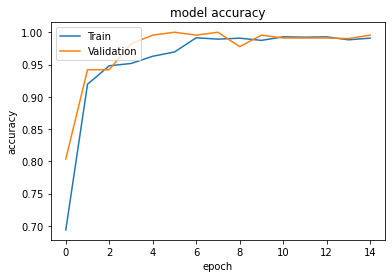

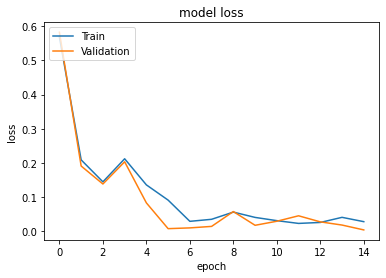

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Create predictions on test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

9/9 [==============================] - 7s 592ms/step


NameError: name 'confusion_matrix' is not defined

In [19]:
model.save("tensorflow_model.h5")

In [64]:
model.save("latest_model.h5")

In [25]:
import numpy as np

Actual label Pepper__bell___Bacterial_spot
(1, 256, 256, 3)
1/1 [==============================] - 0s 72ms/step
[[9.9999964e-01 3.3429345e-07]]
Pepper__bell___Bacterial_spot


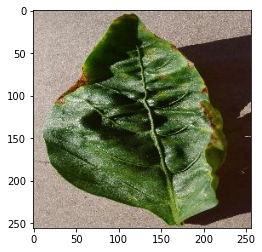

In [50]:
for images_batch, labels_batch in test_ds.take(1):
#     print(images_batch[0])
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    plt.imshow(first_image)
    print("Actual label",class_names[first_label])
    #print(first_image)
#     print(images_batch)
    first_image=[first_image]
    first_image=tf.convert_to_tensor(first_image)
    print(first_image.shape)
    batch_prediction=model.predict(first_image)
    print(batch_prediction)
    print(class_names[np.argmax(batch_prediction)])

In [52]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0])

tf.Tensor(
[[[190. 182. 171.]
  [194. 186. 175.]
  [190. 182. 171.]
  ...
  [192. 182. 173.]
  [195. 185. 176.]
  [196. 186. 177.]]

 [[204. 196. 185.]
  [200. 192. 181.]
  [184. 176. 165.]
  ...
  [181. 171. 162.]
  [180. 170. 161.]
  [179. 169. 160.]]

 [[178. 170. 159.]
  [186. 178. 167.]
  [186. 178. 167.]
  ...
  [186. 176. 167.]
  [185. 175. 166.]
  [183. 173. 164.]]

 ...

 [[160. 139. 122.]
  [150. 129. 112.]
  [130. 109.  92.]
  ...
  [153. 131. 117.]
  [153. 131. 117.]
  [150. 128. 114.]]

 [[149. 128. 111.]
  [154. 133. 116.]
  [153. 132. 115.]
  ...
  [180. 158. 144.]
  [139. 117. 103.]
  [161. 139. 125.]]

 [[133. 112.  95.]
  [158. 137. 120.]
  [143. 122. 105.]
  ...
  [138. 116. 102.]
  [127. 105.  91.]
  [146. 124. 110.]]], shape=(256, 256, 3), dtype=float32)


In [21]:
model.save("new_model2.h5")

In [59]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [66]:
from keras.models import load_model
import cv2
import numpy as np

In [24]:
new_model=load_model('new_model2.h5')

In [25]:
image_path="C:\Users\bindu\Interdisciplinary Project\Plantvillage\Pepper__bell___healthy\01fbd010-0cc1-4c48-98bc-49e328bf9bbc___JR_HL 8584.JPG"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (669833571.py, line 1)

In [25]:
img=cv2.imread("C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___healthy/01fbd010-0cc1-4c48-98bc-49e328bf9bbc___JR_HL 8584.JPG")

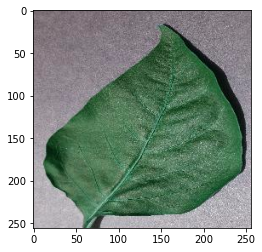

In [26]:
plt.imshow(img)

In [29]:
resize=tf.image.resize(img,(256,256))
resize=np.expand_dims(resize/255.0, 0)

In [30]:
yhat=new_model.predict(resize)

1/1 [==============================] - 0s 383ms/step


In [31]:
print(yhat)

[[0.89611036 0.10388967]]


In [38]:
image_1=cv2.imread("C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___Bacterial_spot/0d8421cd-eebc-4018-b591-12352dd970a7___JR_B.Spot 3234.JPG")

In [39]:
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

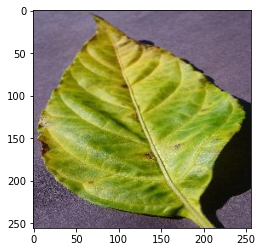

In [40]:
plt.imshow(image_1)

In [41]:
resize=tf.image.resize(image_1,(256,256))
resize=np.expand_dims(resize/255.0, 0)
yhat=new_model.predict(resize)
print(yhat)

1/1 [==============================] - 0s 75ms/step
[[0.89487755 0.10512245]]


In [74]:
image_2="C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___Bacterial_spot/1b0cfb07-f452-49e0-85ad-45f3f519ca7a___JR_B.Spot 9094.JPG"

In [43]:
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

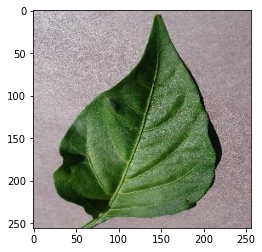

In [44]:
plt.imshow(image_2)

In [45]:
resize=tf.image.resize(image_2,(256,256))
resize=np.expand_dims(resize/255.0, 0)
yhat=new_model.predict(resize)
print(yhat)

1/1 [==============================] - 0s 76ms/step
[[0.89594907 0.10405094]]


In [35]:
from PIL import Image

tf.Tensor(
[[[179 166 184]
  [178 165 183]
  [173 160 178]
  ...
  [155 146 165]
  [160 151 170]
  [167 158 177]]

 [[180 167 185]
  [184 171 189]
  [184 171 189]
  ...
  [153 144 163]
  [174 165 184]
  [178 169 188]]

 [[184 171 189]
  [187 174 192]
  [185 172 190]
  ...
  [164 155 174]
  [175 166 185]
  [162 153 172]]

 ...

 [[143 126 142]
  [124 107 123]
  [120 103 119]
  ...
  [130 113 131]
  [120 103 121]
  [147 130 148]]

 [[154 137 153]
  [114  97 113]
  [ 94  77  93]
  ...
  [127 110 128]
  [140 123 141]
  [108  91 109]]

 [[130 113 129]
  [162 145 161]
  [ 90  73  89]
  ...
  [100  83 101]
  [ 93  76  94]
  [128 111 129]]], shape=(256, 256, 3), dtype=uint8)
dtype of tensor: <dtype: 'uint8'>


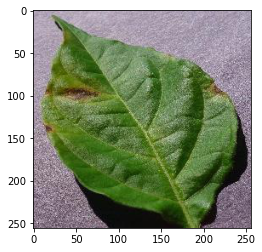

In [43]:
img = Image.open("C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___Bacterial_spot/ffa3b1df-49c6-4fd2-9ec5-1ca5eb175797___JR_B.Spot 3254.JPG")
#print(img)
plt.imshow(img)
# Convert the PIL image to Tensor
img_to_tensor = tf.convert_to_tensor(img)
# print the converted Torch tensor
print(img_to_tensor)
print("dtype of tensor:",img_to_tensor.dtype)

In [6]:
first_image=img_to_tensor.numpy().astype('uint8')
#first_label=labels_batch[0].numpy()
plt.imshow(first_image)
#print("Actual label",class_names[first_label])
first_image=[first_image]
first_image=tf.convert_to_tensor(first_image)
#print(first_image)
batch_prediction=model.predict(first_image)
print(batch_prediction)
print(class_names[np.argmax(batch_prediction)])

NameError: name 'img_to_tensor' is not defined

In [ ]:
first_image=

In [ ]:

    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    plt.imshow(first_image)
    print("Actual label",class_names[first_label])
    #print(first_image)
#     print(images_batch)
    first_image=[first_image]
    first_image=tf.convert_to_tensor(first_image)
    #print(first_image)
    batch_prediction=model.predict(first_image)
    print(batch_prediction)
    print(class_names[np.argmax(batch_prediction)])

In [26]:
import numpy as np

In [4]:
a = np.array([1,2,3,4,5,6])
a.reshape(-1,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
import cv2

In [7]:
img = cv2.imread(r"C:\Users\bindu\Downloads\cat.jpg")

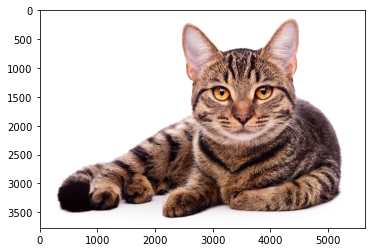

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

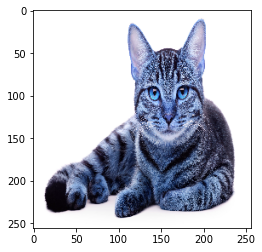

In [16]:
import matplotlib.pyplot as plt
plt.imshow(cv2.resize(img,(256,256)))

In [14]:
cv2.resize(img,(0,0),fx = 0.45,fy = 0.55).shape

(2074, 2542, 3)

In [28]:
def read_img(img):
    import cv2
    img = cv2.imread(img)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

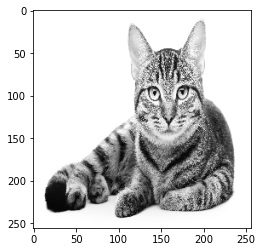

In [35]:
data = read_img(r"C:\Users\bindu\Downloads\cat.jpg")
plt.imshow(data[:,:,0],cmap = "gray")

In [36]:
import base64
base64.encode()

TypeError: encode() missing 2 required positional arguments: 'input' and 'output'

In [47]:
l=[1,2,3,4,5]

In [48]:
a=np.array(l)

In [39]:
a.shape

(5,)

In [42]:
a=[a]
a=np.array(a)

In [43]:
a.shape

(1, 1, 5)

In [44]:
a

array([[[1, 2, 3, 4, 5]]])

In [51]:
np.expand_dims(a,axis = 0).shape

(1, 5)

In [25]:
from PIL import Image

In [34]:
image_path="C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___healthy/1b574484-60cd-4ae4-83ed-511a5ae07ea8___JR_HL 7849.JPG"

In [10]:
img = Image.open(image_path)
img=img.resize((256,256))
img_to_tensor = tf.convert_to_tensor(img)

1/1 [==============================] - 0s 50ms/step
[[0.68896705 0.31103292]]


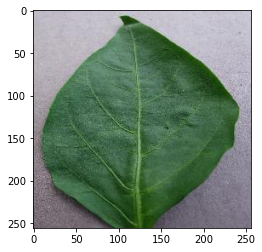

In [11]:
first_image=img_to_tensor.numpy().astype('uint8')
plt.imshow(first_image)
    # print(first_image.shape)
first_image=first_image/255.0
    # print(first_image)
first_image=[first_image]
    #print(first_image.shape)
first_image=tf.convert_to_tensor(first_image)
batch_prediction=new_model.predict(first_image)
print(batch_prediction)

In [3]:
new_model=load_model('new_model2.h5')

In [69]:
image_path="C:/Users/bindu/Interdisciplinary Project/Plantvillage/Pepper__bell___healthy/fd305c29-a9b6-4720-a568-bf94d9a37c7f___JR_HL 8303.JPG"

In [67]:
new_model=load_model('latest_model.h5')

In [70]:
img = Image.open(image_path)
img=img.resize((256,256))
img_to_tensor = tf.convert_to_tensor(img)
reshaped_tensor = tf.expand_dims(img_to_tensor, axis=0)
# print(reshaped_tensor.shape)
# first_image=img_to_tensor.numpy().astype('uint8')
# plt.imshow(first_image)
#     # print(first_image.shape)
# first_image=first_image/255.0
#     # print(first_image)
# first_image=[first_image]
#     #print(first_image.shape)
# first_image=tf.convert_to_tensor(first_image)
batch_prediction=new_model.predict(reshaped_tensor)
print(batch_prediction)
print(class_names[np.argmax(batch_prediction)])

1/1 [==============================] - 0s 31ms/step
[[0.26645634 0.73354363]]
Pepper__bell___healthy
